# Import important Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection

In [ ]:
data = pd.read_csv("/content/adult.csv")

# Exploratory Data Analysis

In [ ]:
gender_index = data.columns.get_loc('gender')
print("Index of 'gender' column:", gender_index)


Index of 'gender' column: 9


In [ ]:
# Display the first few rows of the dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Descriptive statistics
data.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


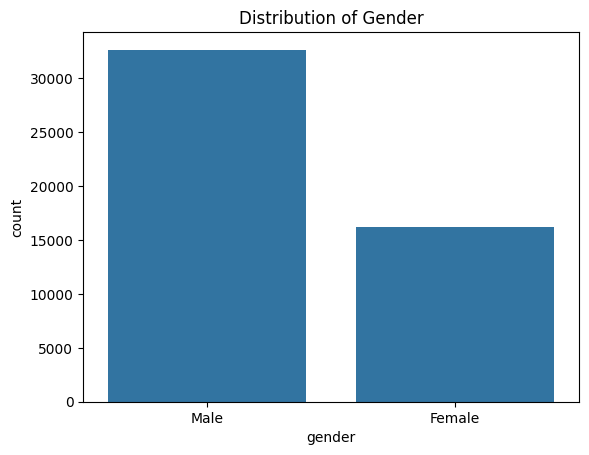

In [ ]:
# Visualize the distribution of the target variable (gender)
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

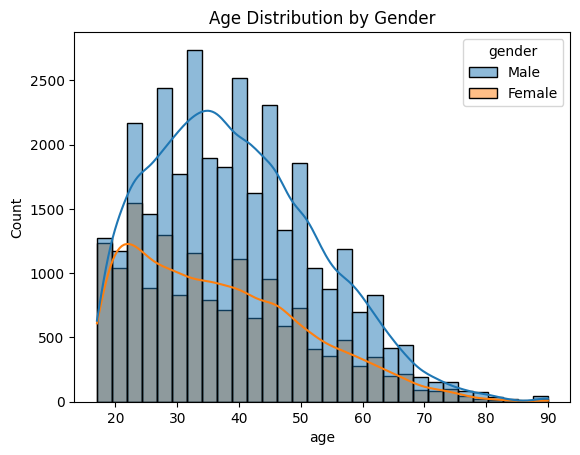

In [ ]:
# Visualize the distribution of other relevant features
# For example, age distribution by gender
sns.histplot(x='age', hue='gender', data=data, bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.show()

# Feature Engineering

In [ ]:
# Drop irrelevant features or those with too many missing values
data.drop(['fnlwgt', 'native-country'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features (X) and target (y)
X = data.drop('gender_Male', axis=1)
y = data['gender_Male']

# Perform feature scaling if necessary
# Example: Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Model Development and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8449175964786569
              precision    recall  f1-score   support

       False       0.75      0.81      0.78      3258
        True       0.90      0.86      0.88      6511

    accuracy                           0.84      9769
   macro avg       0.82      0.84      0.83      9769
weighted avg       0.85      0.84      0.85      9769

Decision Tree Accuracy: 0.8053024874603337
              precision    recall  f1-score   support

       False       0.70      0.73      0.71      3258
        True       0.86      0.85      0.85      6511

    accuracy                           0.81      9769
   macro avg       0.78      0.79      0.78      9769
weighted avg       0.81      0.81      0.81      9769

Random Forest Accuracy: 0.8396970007165524
              precision    recall  f1-score   support

       False       0.75      0.77      0.76      3258
        True       0.88      0.87      0.88      6511

    accuracy                           0.84    